# PROBLEM STATEMENT :

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

## BUSINESS GOAL :

 Categorise the countries using some socio-economic and health factors that determine the overall development of the country and suggest the countries which the CEO needs to focus on the most. 

## STEP 1 : Reading & Understanding Data

### 1. Import Modules :

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

#For Scaling
from sklearn.preprocessing import StandardScaler

#For the Hopkins statistic score
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# To perform K-means clustering
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### 2. Get the Data & Data Dictionary :

In [2]:
# Load the data-set
df = pd.read_csv(r"C:\Users\Nmahanta\Downloads\Country-data (1).csv")

In [3]:
# Getting few rows from the data-set
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Load data dictionary to understand the data:
data_dict = pd.read_csv(r"C:\Users\Nmahanta\Downloads\data-dictionary+ (1).csv")

In [5]:
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


### 3. Inspecting the DataFrame - Shape, Info, Describe(Summary)

In [6]:
# Size of data-set
df.shape

(167, 10)

In [7]:
# Type of variables that contribute to the data-set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### All the data-types are seem to be fine. 

In [8]:
# Summary of data-set
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### 4. Null & Duplicate Analysis :

In [9]:
# Checking for null values in the data-set
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### There is no null values in the data-set

In [10]:
# Check if there is any duplicate country
sum(df.duplicated(subset = 'country')) == 0


True

#### There is no duplicate countries. We can proceed with our EDA

In [11]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


##### Insights :- 
In the above data-set the columns export,import and health are given in percentage of gdp. Because of that the gdpp of countries like Afghanistan and Albania are 553 and 4090 respectively, but their imports have nearly close value,i.e., 44.9 and 48.6 respectively. So we need to convert them to their actual value.

### 5. Data Transformation :

In [12]:
# Converting values of import,export, health to actual values:
df['imports'] = df['imports']*df['gdpp']/100
df['exports'] = df['exports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [13]:
# Checking data
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## STEP 2 : Exploratory Data Analysis

We need to choose atleast 5 countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.

### 1. Univariate Analysis :

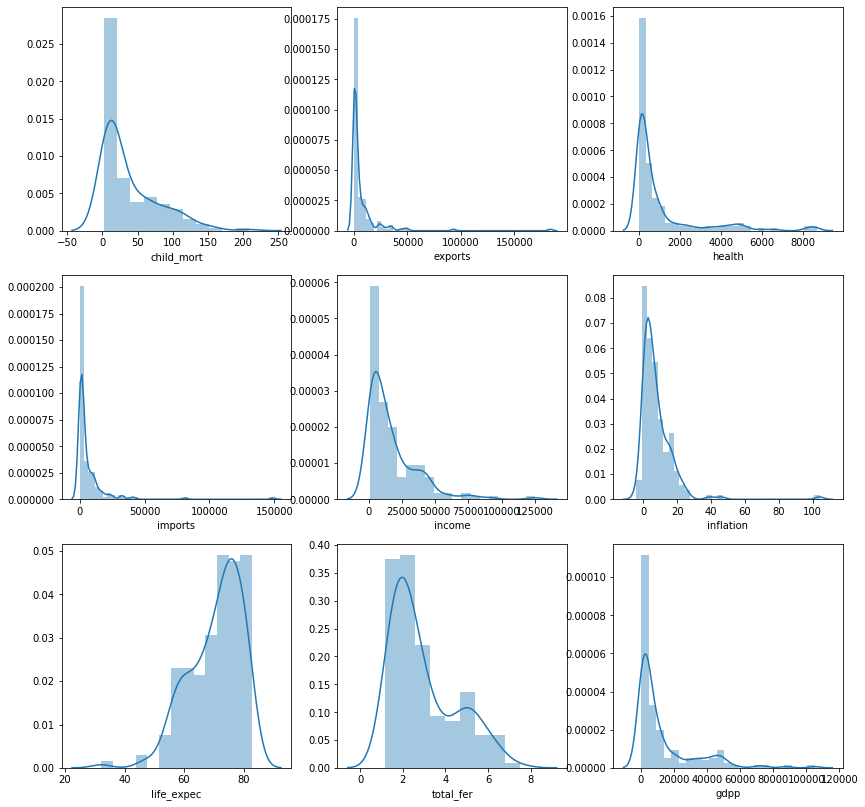

In [14]:
fig, axs = plt.subplots(3,3,figsize = (14,14))
sns.distplot(df.child_mort,ax=axs[0,0])
sns.distplot(df.exports,ax=axs[0,1])
sns.distplot(df.health,ax=axs[0,2])
sns.distplot(df.imports,ax=axs[1,0])
sns.distplot(df.income,ax=axs[1,1])
sns.distplot(df.inflation,ax=axs[1,2])
sns.distplot(df.life_expec,ax=axs[2,0])
sns.distplot(df.total_fer,ax=axs[2,1])
sns.distplot(df.gdpp,ax=axs[2,2])
plt.show()

##### Insight :
Except life_expec, all of them are right-skewed.

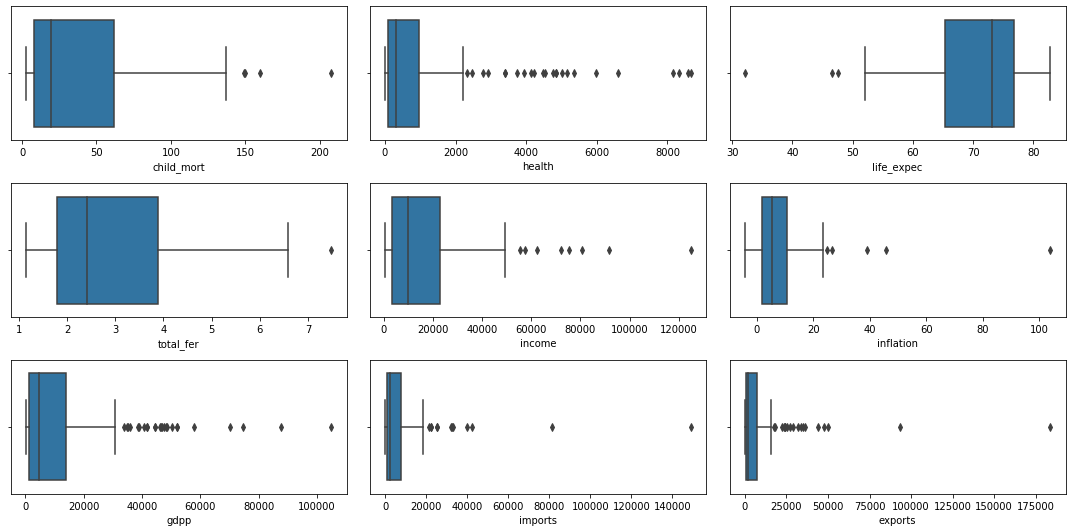

In [15]:
# Outlier Treatment:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df['health'], ax = axs[0,1])
plt3 = sns.boxplot(df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df['income'], ax = axs[1,1])
plt6 = sns.boxplot(df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df['exports'], ax = axs[2,2])


plt.tight_layout()

### Outlier Treatment : 

From the above plots, we can conculde the following:

1. There are outliers in each features. 
2. Most of the outliers are in health, exports and gdpp.
3. There are only 167 rows(countries), so removing these outliers will delete the crucial information from the datesets.
4. Outliers from only 'gdpp' column need to be removed because the coutries with high gdpp would not require an aid.

In [16]:
#Caluclating the quantile1 and quantile3 for gdpp and removing the upper outliers
Q1 = df.gdpp.quantile(0.05)
Q3 = df.gdpp.quantile(0.95)

df[(df.gdpp > Q3)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
110,Netherlands,4.5,36216.0,5985.70,31990.8,45500,0.848,80.7,1.79,50300
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.980,79.5,2.07,70300
144,Sweden,3.0,24070.2,5017.23,21204.7,42900,0.991,81.5,1.98,52100
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600


##### Insight :
In the above table we can see, that Qatar is having a high child mortality rate of 9.0, but its other features like gdpp, total_fertility rate, income etc are in the higher range. So it would not be first in the list of needy countries. 

In [17]:
#After removing the outlier
df = df[(df.gdpp <= Q3)]
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [18]:
df.shape

(158, 10)

### 2. Bivariate Analysis 

#### (a) Categorical vs Numerical : Variation of other numerical factors in different countries

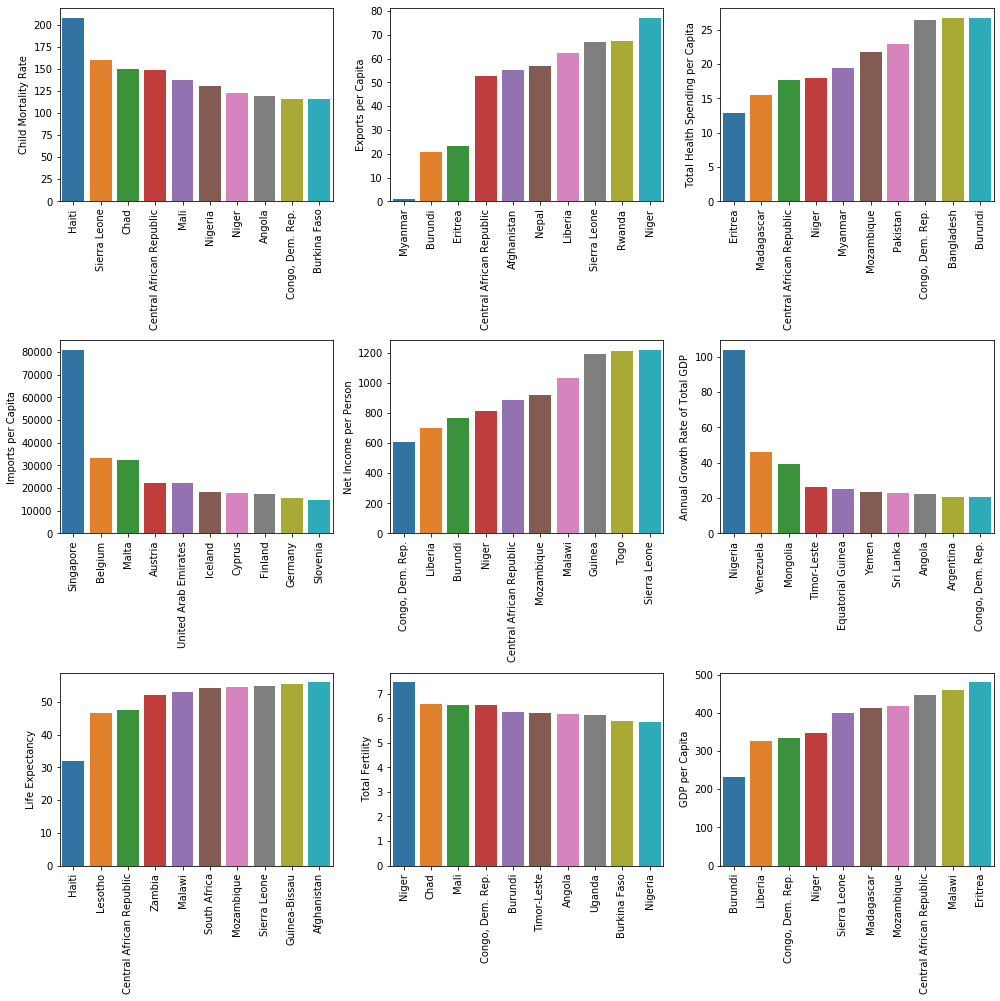

In [19]:
fig, axs = plt.subplots(3,3,figsize = (14,14))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
child_mort = df[['country','child_mort']].sort_values('child_mort',ascending=False).head(10)
plt1 = sns.barplot(x='country',y='child_mort',data=child_mort,ax=axs[0,0])
plt1.set(xlabel='',ylabel='Child Mortality Rate')

# Exports : Exports of goods and services per capita. Given as %age of the GDP per capita
exports = df[['country','exports']].sort_values('exports',ascending=True).head(10)
plt1 = sns.barplot(x='country',y='exports',data=exports,ax=axs[0,1])
plt1.set(xlabel='',ylabel='Exports per Capita')

# Health : Total health spending per capita. Given as %age of GDP per capita
health = df[['country','health']].sort_values('health',ascending=True).head(10)
plt1 = sns.barplot(x='country',y='health',data=health,ax=axs[0,2])
plt1.set(xlabel='',ylabel='Total Health Spending per Capita')

# Imports : Imports of goods and services per capita. Given as %age of the GDP per capita
imports = df[['country','imports']].sort_values('imports',ascending=False).head(10)
plt1 = sns.barplot(x='country',y='imports',data=imports,ax=axs[1,0])
plt1.set(xlabel='',ylabel='Imports per Capita')

# Income : Net income per person
income = df[['country','income']].sort_values('income',ascending=True).head(10)
plt1 = sns.barplot(x='country',y='income',data=income,ax=axs[1,1])
plt1.set(xlabel='',ylabel='Net Income per Person')

# Inflation : The measurement of the annual growth rate of the Total GDP
inflation = df[['country','inflation']].sort_values('inflation',ascending=False).head(10)
plt1 = sns.barplot(x='country',y='inflation',data=inflation,ax=axs[1,2])
plt1.set(xlabel='',ylabel='Annual Growth Rate of Total GDP')

# Life Expectancy : The average number of years a new born child would live if the current mortality patterns are to remain the same
life_expec = df[['country','life_expec']].sort_values('life_expec',ascending=True).head(10)
plt1 = sns.barplot(x='country',y='life_expec',data=life_expec,ax=axs[2,0])
plt1.set(xlabel='',ylabel='Life Expectancy')

# total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
total_fer = df[['country','total_fer']].sort_values('total_fer',ascending=False).head(10)
plt1 = sns.barplot(x='country',y='total_fer',data=total_fer,ax=axs[2,1])
plt1.set(xlabel='',ylabel='Total Fertility')

# gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population.
gdpp = df[['country','gdpp']].sort_values('gdpp',ascending=True).head(10)
plt1 = sns.barplot(x='country',y='gdpp',data=gdpp,ax=axs[2,2])
plt1.set(xlabel='',ylabel='GDP per Capita')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()


##### Insight :
1. Our Criteria for under-developed country are - low gdpp, low income, high child_mort, low spending on health, low life_expec. So we have an idea about some countries in each category. We will focus on those countries which face low gdpp, low income and high child_mort simultaneously.

#### (b) Numerical vs Numerical - To check if there is any correlation exist

<Figure size 1440x2520 with 0 Axes>

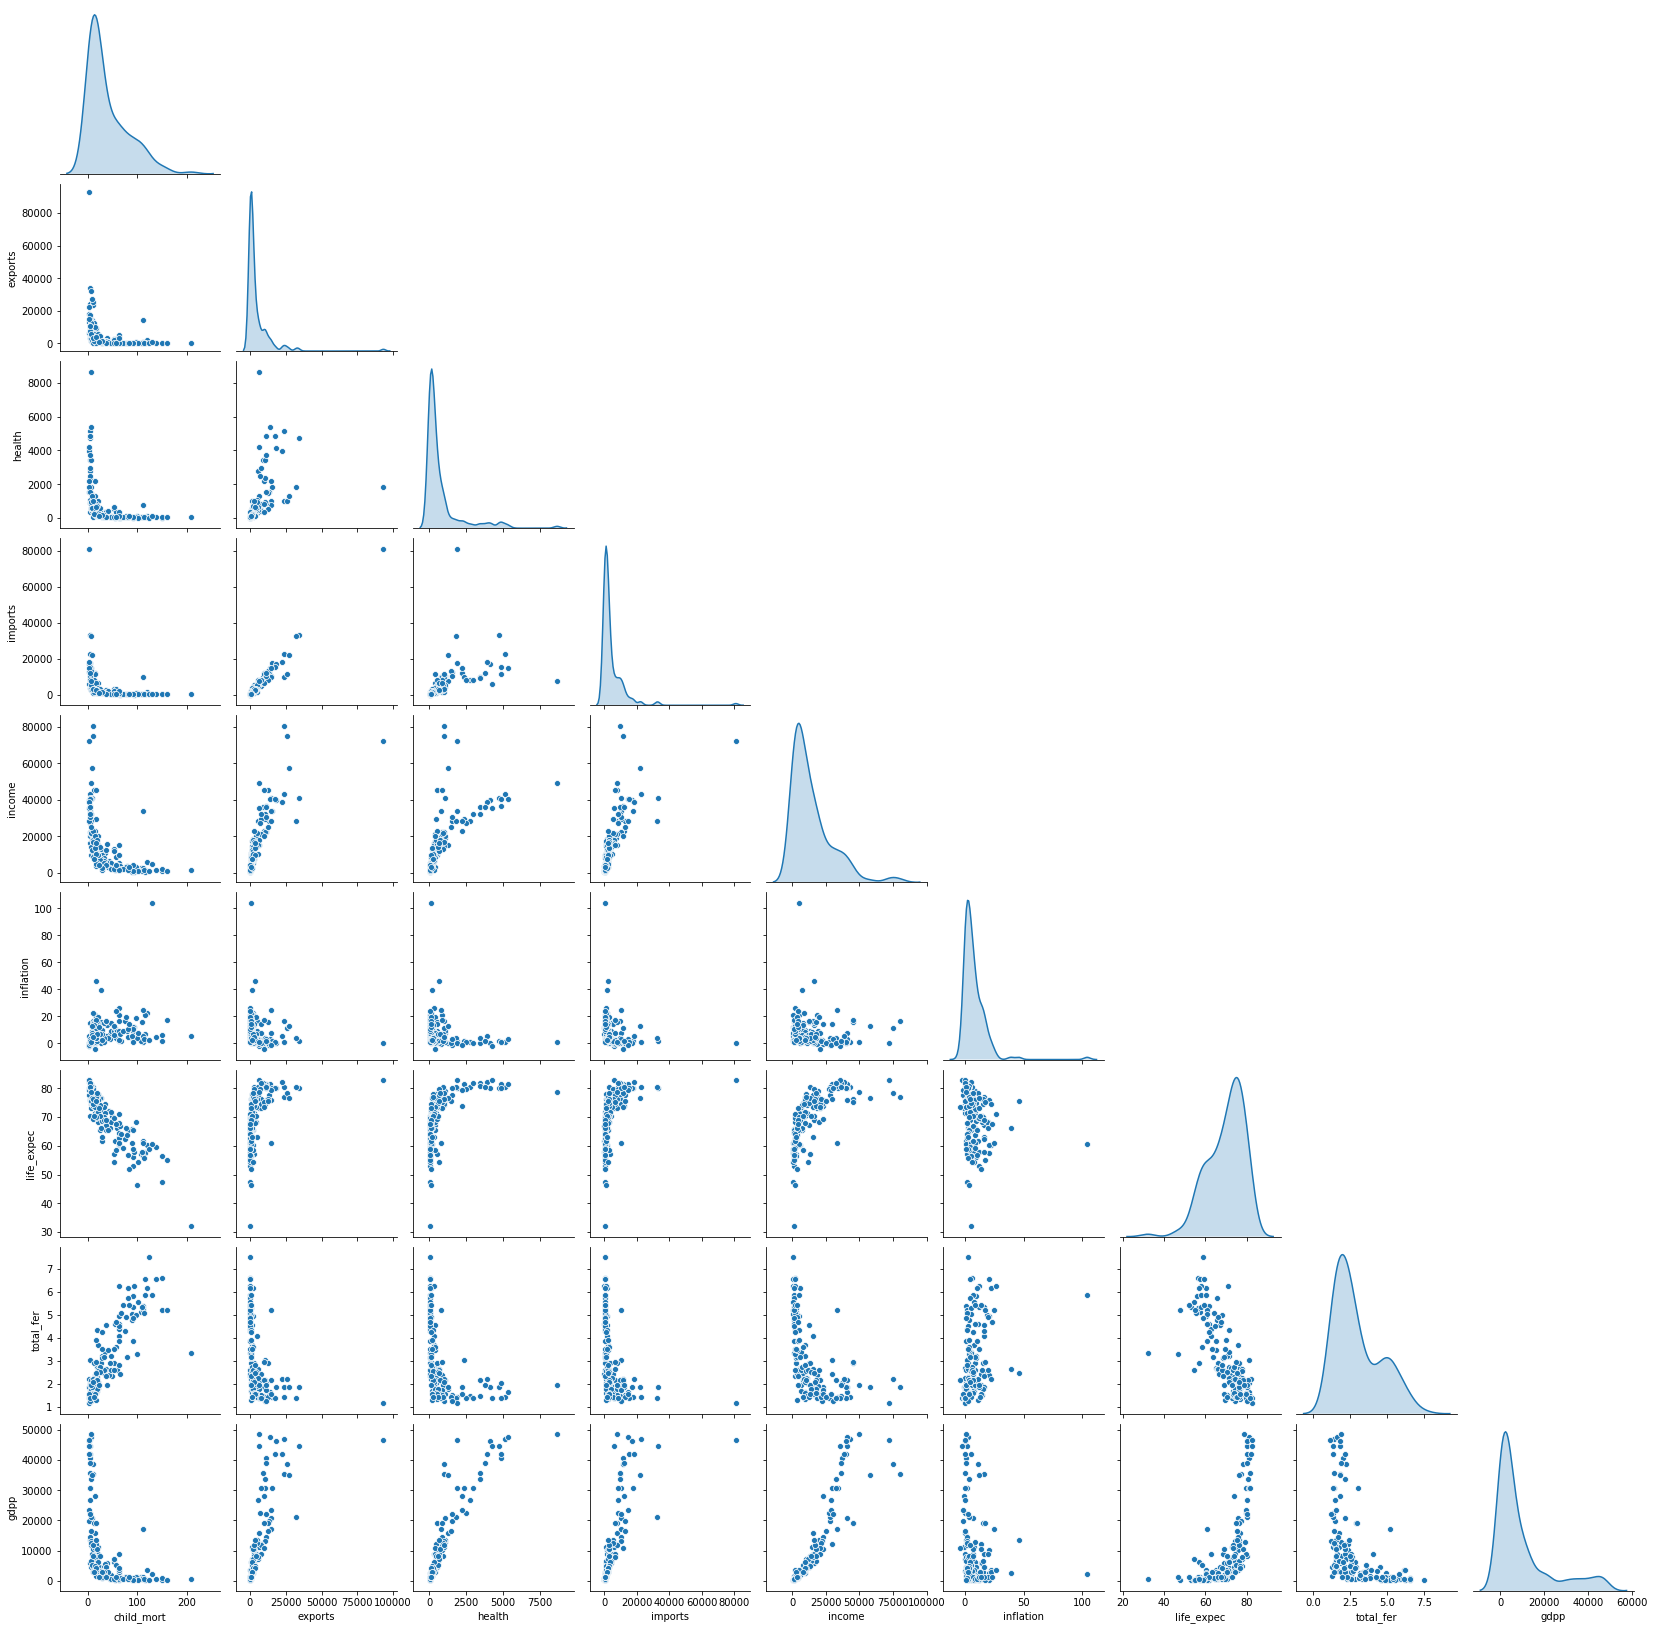

In [20]:
# Pair plot among the numerical variables
fig = plt.figure(figsize=(20,35))
sns.pairplot(df,diag_kind='kde',corner=True)
plt.show()

##### Insight :- 

1. gdpp is highly and positively correlated with health and income.
2. gdpp is inversely correlated with child_mortality, total fertility and inflation
3. imports and exports are also positively correlated with gddp.
4. Also there is linear realtionship between gdpp vs income,imports vs exports, total_fer vs child_mort

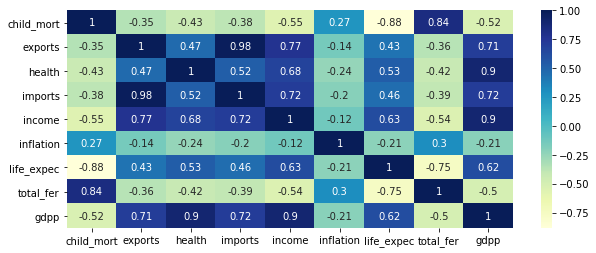

In [21]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 4))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### Insights :
1. High correlation exist between gdpp and health, gdpp and income, total_fer and child_mort, exports and imports. 

#### Top 10 coutries with highest mortality rate :

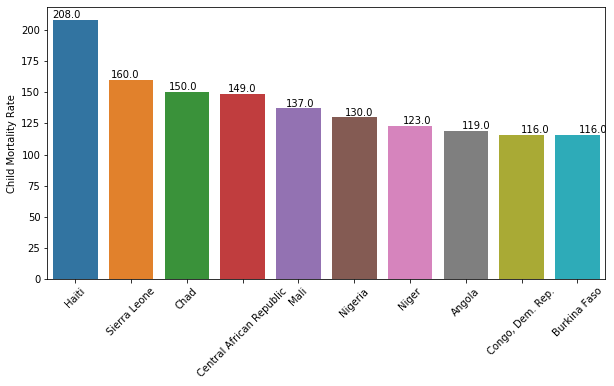

In [22]:

plt.figure(figsize = (10,5))
child_mort_top10 = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
ax=sns.barplot(x='country', y='child_mort', data= child_mort_top10)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.05 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=45)
plt.show()

#### Top 10 countries with the lowest spending on health

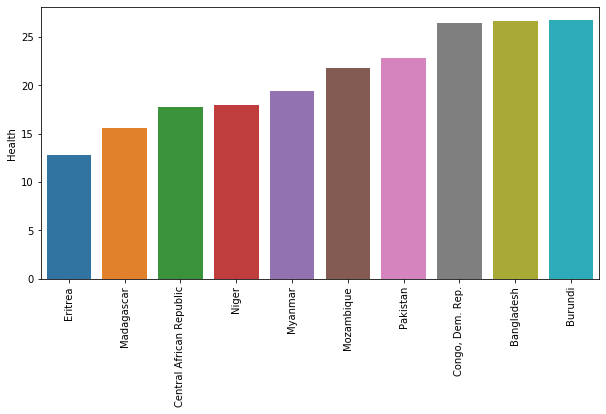

In [23]:

plt.figure(figsize = (10,5))
health = df[['country','health']].sort_values('health', ascending = True).head(10)
ax = sns.barplot(x='country', y='health', data= health)
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

#### Top 10 countries with lowest per capita income

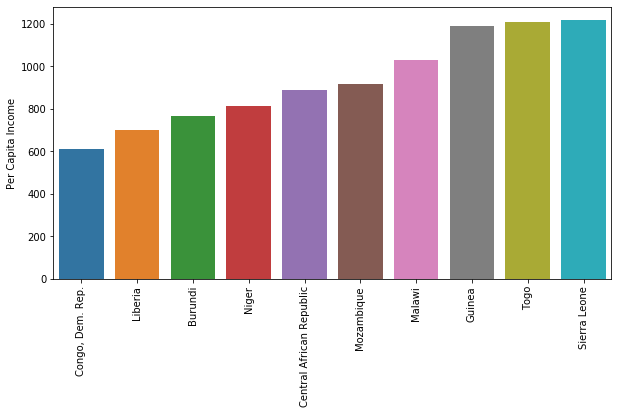

In [24]:

plt.figure(figsize = (10,5))
income_lowets_10 = df[['country','income']].sort_values('income', ascending = True).head(10)
axes = sns.barplot(x='country', y='income', data= income_lowets_10)
axes.set(xlabel = '', ylabel= 'Per Capita Income')
plt.xticks(rotation=90)
plt.show()

#### Top 10 countries with lowest per capita income

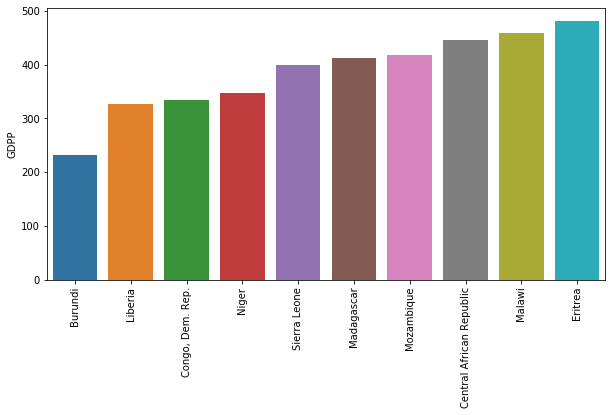

In [25]:

plt.figure(figsize = (10,5))
income_lowets_10 = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
axes = sns.barplot(x='country', y='gdpp', data= income_lowets_10)
axes.set(xlabel = '', ylabel= 'GDPP')
plt.xticks(rotation=90)
plt.show()

##### Insight :-
From the above visulizations we get a good idea about the under developed countries which might be in need of the NGOs aid.

## STEP 3.1. Scaling the Data

It is extremely important to rescale the numerical-variables so that they have a comparable scale. There are two common ways of scaling.
1. Min-Max Scaling
2. Standardization(mean=0,sigma=1)

Here we will use Standardization Scaling.

Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [26]:
# Import the StandardScaler()
features = df.columns
scaler = StandardScaler()
df_scaled= scaler.fit_transform(df.drop('country',axis=1))
df_scaled

array([[ 1.2348468 , -0.51008966, -0.56360764, ..., -1.57290118,
         1.83898931, -0.73837646],
       [-0.58270965, -0.39606338, -0.39146172, ...,  0.7236459 ,
        -0.88967589, -0.45936668],
       [-0.3184725 , -0.33669732, -0.45386166, ...,  0.74649712,
        -0.07827425, -0.4301799 ],
       ...,
       [-0.41725274, -0.4171968 , -0.5272808 , ...,  0.35802647,
        -0.69336904, -0.6786619 ],
       [ 0.39768425, -0.4747592 , -0.54384653, ..., -0.28180754,
         1.08647972, -0.6786619 ],
       [ 1.05951187, -0.45935901, -0.53003083, ..., -2.05277669,
         1.56415972, -0.66682942]])

In [27]:
# data after scaling :
df1 = pd.DataFrame(df_scaled)
df1.columns = features[1:]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.234847,-0.510090,-0.563608,-0.530152,-0.856955,0.124994,-1.572901,1.838989,-0.738376
1,-0.582710,-0.396063,-0.391462,-0.321693,-0.308713,-0.336520,0.723646,-0.889676,-0.459367
2,-0.318473,-0.336697,-0.453862,-0.392076,-0.113006,0.745941,0.746497,-0.078274,-0.430180
3,1.946065,-0.285794,-0.518900,-0.378423,-0.574267,1.333323,-1.127302,2.061470,-0.503541
4,-0.738289,0.064875,-0.035126,0.301255,0.295540,-0.620888,0.780774,-0.575585,0.180376


## STEP 3.2 - Data Preparation for Clustering :
Before applying any clustering algorithm to the given data set, it is important to check whether the given data has some meaningful clusters or not. The process to evaluate the data to check if the data is feasible for clustering or not is known as cluster tendency. To check cluster tendency, we use Hopkins Statistics.

### 1. Hopkins Statistics : 
The Hopkins statistic is a way of measuring the cluster tendency of a data set.
1. A value close to 1 tends to indicate the data is highly clustered.
2. Random data will tend to result in values around 0.5.
3. Uniformly distributed data will tend to result in values close to 0.

In [28]:
#Find the Hopkins statistic score

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
    return H

In [29]:
hopkins(df.drop('country', axis = 1))

0.9649662977119454

We have got the Hopkins score close to 1 which indicate the data is highly clustered.

## Step 4 : Perform Clustering on Data
1. K-Means Clustering
2. Hierarchical Clustering

## I. K-Means Clustering : 
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
The algorithm works as follows:
1. First we initialize k points, called means, randomly.
2. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
3. We repeat the process for a given number of iterations and at the end, we have our clusters.

#### Logic behind using K-Means clustering :
1. The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets.
2. In our data set, we aim to find a group or cluster of under-developed countries based on some socio-economic factors. Based on common features that we need, k-means clustering will gives us a some clusters which are represented by k-values (ex- for k=3 we will have 3 clusters). Depending on our criteria, we can chose that particular cluster which satisfy our conditions. The countries in that clusters are what we need.
 

In [30]:
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(df1)
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1,
       2, 1, 3, 3, 1, 3, 2, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 2, 2, 1,
       1, 1, 1, 3, 3, 1, 1, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 3, 1, 3, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 3, 3, 2, 1, 3, 1, 1, 3, 3, 1, 1,
       1, 3, 3, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2, 3, 3, 2,
       3, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 3, 1, 1, 3, 0, 2, 2, 3, 1, 2,
       2, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 3, 3])

### 1. Choose optimal number of clusters :

First we need to find optimal number of clusters. There are two methods to find :
1. Elbow Curve Method/SSD
2. Silhouette Analysis

### (a) Elbow Curve :
In K-Means cluster analysis, the elbow method is used to determine the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

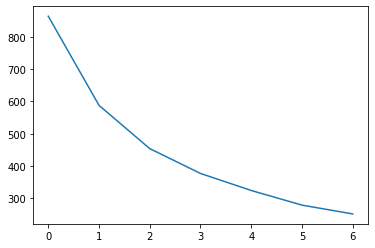

In [31]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(df1)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)    
plt.show()    

##### Insight:
In the above figure,the elbow is at 3 and 4. Better elbow is at k=3 compared to k=4.


### (b) Silhouette Score/Analysis :
The silhouette score is a measure of how similar a data point is to its own cluster (cohesion) compared to other clusters (separation). 
The value ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. 
The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

In [32]:
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(df1)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df1,cluster_labels)
    print("For n_clusters={0},the silhouette score is {1}".format(num_clusters,silhouette_avg))

For n_clusters=2,the silhouette score is 0.4769303319503149
For n_clusters=3,the silhouette score is 0.41495653220376433
For n_clusters=4,the silhouette score is 0.42140707751200024
For n_clusters=5,the silhouette score is 0.4269917078918057
For n_clusters=6,the silhouette score is 0.39687443161351094
For n_clusters=7,the silhouette score is 0.29102555098252947
For n_clusters=8,the silhouette score is 0.30840827106313984


##### Insight:
By looking silhouette plot, we see the highest peak is at k=3 and k=5. Since for k=5 the data points overlap,so we will chose k=3.

### 2.1 K-Means Clustering with k = 4

In [33]:
df1_kmeans = KMeans(n_clusters=4, max_iter=50, random_state= 50)
df1_kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [34]:
df1_kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2,
       0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2,
       2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 1, 2,
       0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2,
       2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0,
       1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 3, 0, 0, 1, 1, 0,
       0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2,
       2, 2, 1, 1])

In [35]:
#Finding the labels and converting it to series so that it can be appended to the `original countries` easily.
labels_kmeans = pd.Series(df1_kmeans.labels_, index=df.index)

In [36]:
#Adding the labels to countries dataset
df_kmeans = df.copy()
df_kmeans['Cluster_ID'] = labels_kmeans
df_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


In [37]:
# Checking the number of countries assigned to each clusters
df_kmeans['Cluster_ID'].value_counts()

2    80
1    48
0    29
3     1
Name: Cluster_ID, dtype: int64

### 2.2 Profiling the clusters based on - [gdpp, child_mort and income]
1. We need those countries whose gdpp is low, child_mort is high and income is also low. All three factors must satisfy simultaneously.


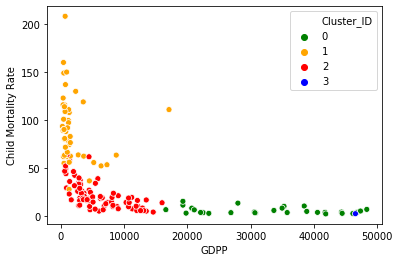

In [38]:
# Bivariate analysis of clustered countries
axes = sns.scatterplot(x='gdpp',y='child_mort',hue='Cluster_ID',legend='full',data=df_kmeans, palette=['green','orange','red','blue'])
axes.set(xlabel = 'GDPP', ylabel= 'Child Mortality Rate')
plt.show()

##### Insights :
 For countries in cluster = 1,the child_mort is high when gdpp is low.

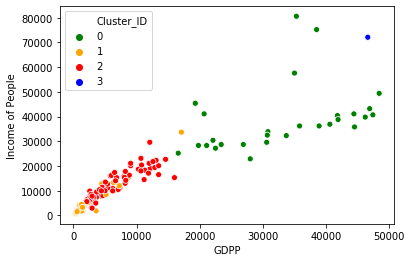

In [39]:
axes = sns.scatterplot(x='gdpp',y='income',hue='Cluster_ID',legend='full',data=df_kmeans, palette=['green','orange','red','blue'])
axes.set(xlabel = 'GDPP', ylabel= 'Income of People')
plt.show()

##### Insight:
For countries in cluster = 1, for low gdpp income of people is also low.

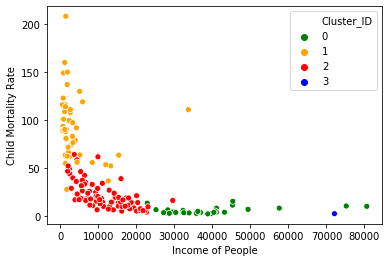

In [40]:
axes = sns.scatterplot(x='income',y='child_mort',hue='Cluster_ID',legend='full',data=df_kmeans, palette=['green','orange','red','blue'])
axes.set(xlabel = 'Income of People', ylabel= 'Child Mortality Rate')
plt.show()

##### Insights : 
For countries in cluster = 1, when income is high the child mortality is low and vice versa.

#### From above figures, it is concluded that the countries in cluster 1 are in direct need of aid.

#### Taking the means and analyzing the clusters further

In [41]:
clusters_child_mort = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).child_mort.mean())
clusters_exports = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).exports.mean())
clusters_health = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).health.mean())
clusters_imports = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).imports.mean())
clusters_income = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).income.mean())
clusters_inflation = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).inflation.mean())
clusters_life_expec = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).life_expec.mean())
clusters_total_fer = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).total_fer.mean())
clusters_gdpp = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).gdpp.mean())

In [42]:
cluster_analysis_df = pd.concat([pd.Series([0,1,2,3]),clusters_child_mort,clusters_exports,clusters_health,clusters_imports,clusters_income,clusters_inflation,clusters_life_expec,clusters_total_fer,clusters_gdpp], axis=1)

In [43]:
cluster_analysis_df.columns = ["Cluster_ID","clusters_child_mort","clusters_exports","clusters_health","clusters_imports","clusters_income","clusters_inflation","clusters_life_expec","clusters_total_fer","clusters_gdpp"]
cluster_analysis_df

,Cluster_ID,clusters_child_mort,clusters_exports,clusters_health,clusters_imports,clusters_income,clusters_inflation,clusters_life_expec,clusters_total_fer,clusters_gdpp
0,0,6.148276,15076.862069,2941.186552,13582.134483,39024.137931,3.750069,79.268966,1.823448,32796.551724
1,1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333
2,2,22.157500,2580.729982,385.856630,2793.990264,11478.625000,7.490737,72.871250,2.273375,5962.150000
3,3,2.800000,93200.000000,1845.360000,81084.000000,72100.000000,-0.046000,82.700000,1.150000,46600.000000


### 2.3 Visualize the Clusters : 

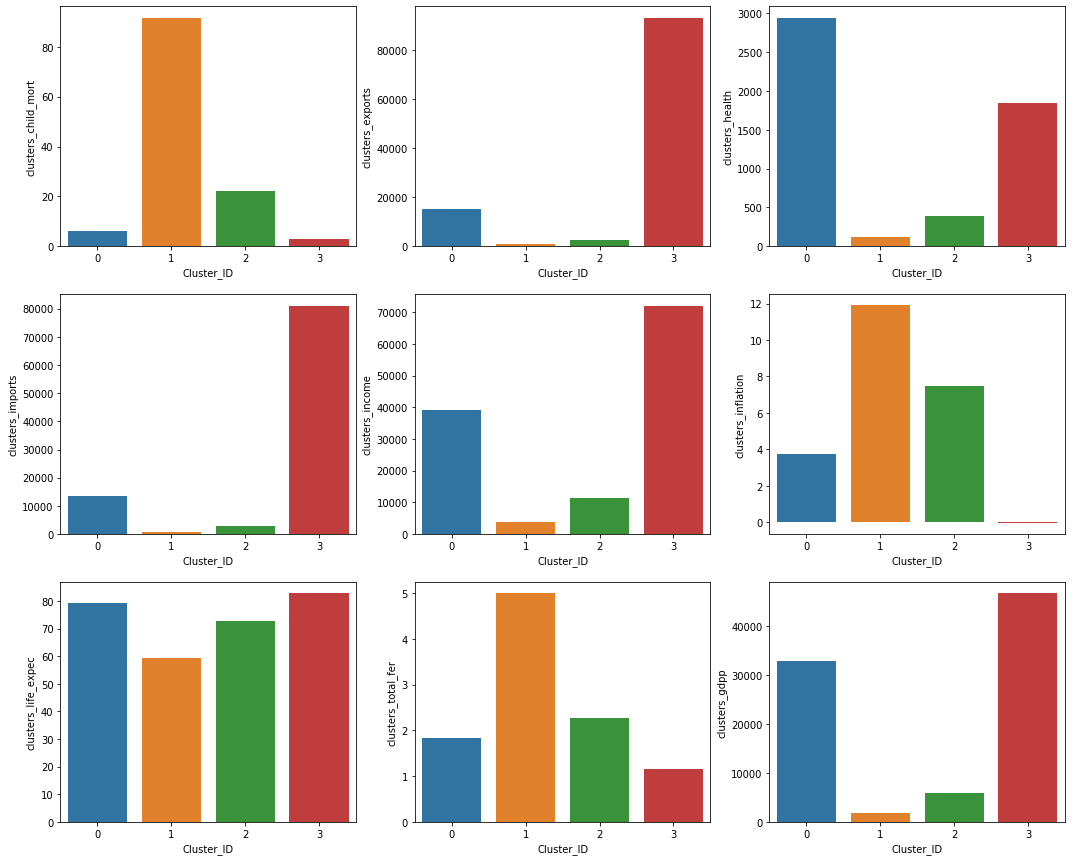

In [44]:
features = cluster_analysis_df.columns
fig = plt.figure(figsize=(18,15))
for plot, feature in enumerate(features[1:]):
    fig.add_subplot(3,3,plot+1)
    sns.barplot(cluster_analysis_df.Cluster_ID, cluster_analysis_df[feature])
plt.show()    

##### Insight :
1. From the above plot also we can see that the criterias like low gdpp, low income and high child mortality are satified by cluster labeled 1.
2. Also we can see there is some overlapping takes place. Try for k=3

### 2.4. Country Identification : 

In [45]:
#Binning the clusters to get the top 5 countries sorted in order exaplined above
clustered_kmeans=df[df_kmeans['Cluster_ID']==1]
clustered_kmeans.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399


### 3.1 KMeans Clustering with k = 3

In [46]:
df1_kmeans = KMeans(n_clusters=3, max_iter=50, random_state= 50)
df1_kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [47]:
df1_kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2,
       0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2,
       2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 1, 2,
       0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2,
       2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1, 1, 0,
       0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2,
       2, 2, 1, 1])

In [48]:
#Finding the labels and converting it to series so that it can be appended to the `original countries` easily.
labels_kmeans = pd.Series(df1_kmeans.labels_, index=df.index)

In [49]:
#Adding the labels to countries dataset
df_kmeans = df.copy()
df_kmeans['Cluster_ID'] = labels_kmeans
df_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


In [50]:
# Checking the number of countries assigned to each clusters
df_kmeans['Cluster_ID'].value_counts()

2    82
1    48
0    28
Name: Cluster_ID, dtype: int64

### 3.2 Profiling the clusters based on - [gdpp, child_mort and income]
1. We need those countries whose gdpp is low, child_mort is high and income is also low. All three factors must satisfy simultaneously.


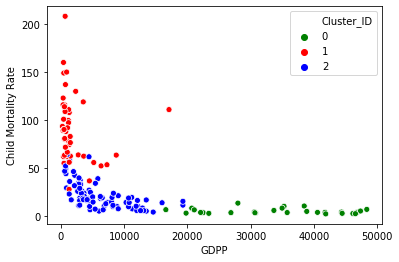

In [51]:
# Bivariate analysis of clustered countries
axes = sns.scatterplot(x='gdpp',y='child_mort',hue='Cluster_ID',legend='full',data=df_kmeans, palette=['green','red','blue'])
axes.set(xlabel = 'GDPP', ylabel= 'Child Mortality Rate')
plt.show()

##### Insights :
 For countries in cluster = 1,the child_mort is high when gdpp is low.

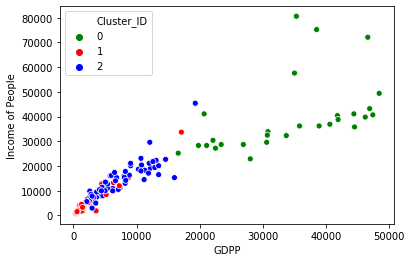

In [52]:
axes = sns.scatterplot(x='gdpp',y='income',hue='Cluster_ID',legend='full',data=df_kmeans, palette=['green','red','blue'])
axes.set(xlabel = 'GDPP', ylabel= 'Income of People')
plt.show()

##### Insights :
 For countries in cluster = 1,the income of people is low when gdpp is low.

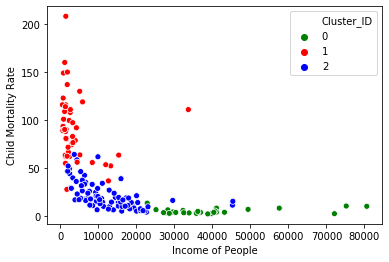

In [53]:
axes = sns.scatterplot(x='income',y='child_mort',hue='Cluster_ID',legend='full',data=df_kmeans, palette=['green','red','blue'])
axes.set(xlabel = 'Income of People', ylabel= 'Child Mortality Rate')
plt.show()

##### Insights :
 For countries in cluster = 1,the child_mort is high when income is low.

#### From above figures, it is concluded that the countries in cluster 1 are in direct need of aid.

#### Taking the means and analyzing the clusters further

In [54]:
clusters_child_mort = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).child_mort.mean())
clusters_exports = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).exports.mean())
clusters_health = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).health.mean())
clusters_imports = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).imports.mean())
clusters_income = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).income.mean())
clusters_inflation = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).inflation.mean())
clusters_life_expec = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).life_expec.mean())
clusters_total_fer = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).total_fer.mean())
clusters_gdpp = pd.DataFrame(df_kmeans.groupby(["Cluster_ID"]).gdpp.mean())

In [55]:
cluster_analysis_df = pd.concat([pd.Series([0,1,2]),clusters_child_mort,clusters_exports,clusters_health,clusters_imports,clusters_income,clusters_inflation,clusters_life_expec,clusters_total_fer,clusters_gdpp], axis=1)

In [56]:
cluster_analysis_df.columns = ["Cluster_ID","clusters_child_mort","clusters_exports","clusters_health","clusters_imports","clusters_income","clusters_inflation","clusters_life_expec","clusters_total_fer","clusters_gdpp"]
cluster_analysis_df

,Cluster_ID,clusters_child_mort,clusters_exports,clusters_health,clusters_imports,clusters_income,clusters_inflation,clusters_life_expec,clusters_total_fer,clusters_gdpp
0,0,5.489286,18149.146429,3063.471071,16451.617857,39753.571429,2.710929,79.653571,1.720357,34253.571429
1,1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333
2,2,21.951220,2789.162177,393.062322,2900.485623,12304.756098,7.708037,72.937805,2.289390,6287.463415


### 3.3 Visualize the Clusters : 

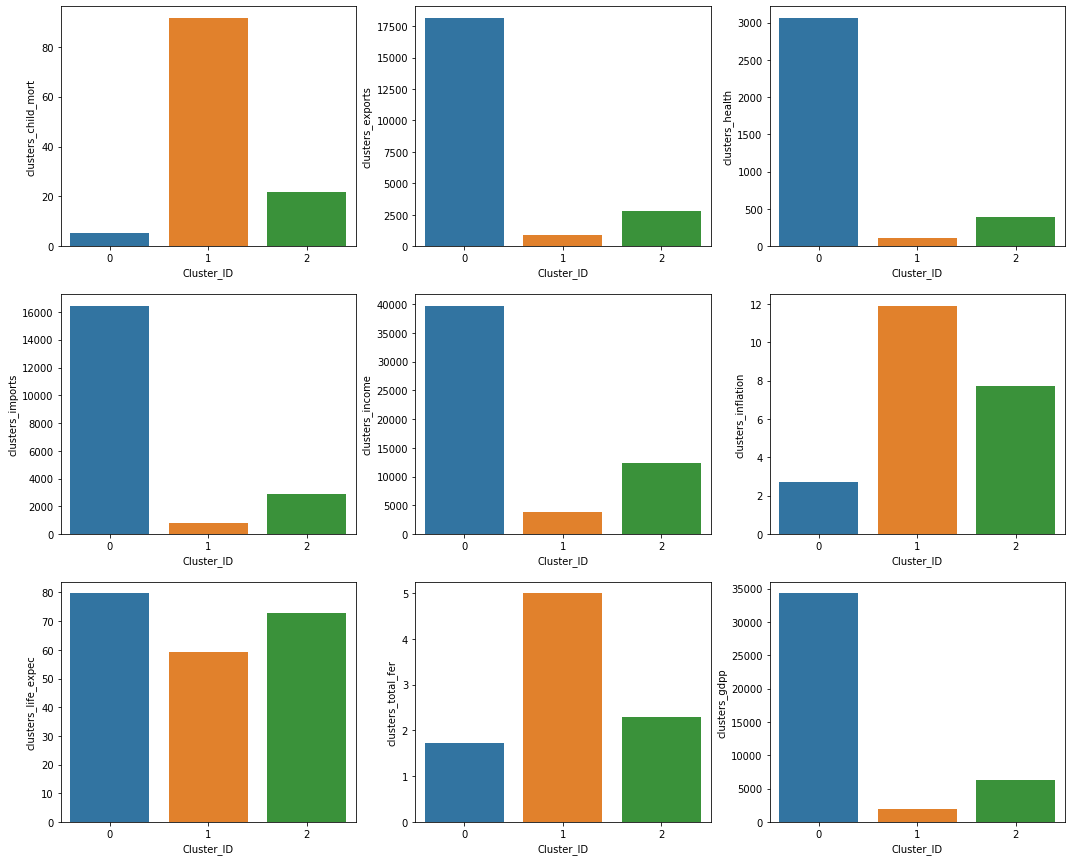

In [57]:
features = cluster_analysis_df.columns
fig = plt.figure(figsize=(18,15))
for plot, feature in enumerate(features[1:]):
    fig.add_subplot(3,3,plot+1)
    sns.barplot(cluster_analysis_df.Cluster_ID, cluster_analysis_df[feature])
plt.show()    

##### Insight :
1. From the above plot also we can see that the criterias like low gdpp, low income and high child mortality are satified by cluster labeled 1.
2. Foe k=3 we got better result in terms of visualization.

### 3.4 Country Identification : 

In [58]:
#Binning the clusters to get the top 10 countries sorted in order exaplined above
clustered_kmeans=df[df_kmeans['Cluster_ID']==1]
clustered_kmeans.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482


##### Insight:
1. Although the result is same for both k=3 and k=4, we will use k=3 for our analysis because the differentiation can be observed better in this case.So from the above results and analysis, we can conclude that as per K- means clustering, the 10 country which are direst need of aid are:

Burundi,Liberia,Congo, Dem. Rep,Niger,Sierra Leone, Madagascar,Mozambique,Central African Republic,Malawi,Eritrea	

## II. Hierarchical Clustering :
Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters.In this case, you don't have pre-defining number of clusters. 

Here, first you have to visually describe the similarity or dissimilarity between the different data points and then decide the appropriate number of clusters on the basis of these similarities or dissimilarities. 

The output of hierarchical clustering results in an inverted tree-shaped structure, called as the Dendrogram.

The different types of linkages in Hierarchical clustering are as follows :
1. Single Linkage: Here, the distance between 2 clusters is defined as the shortest distance between points in the two clusters
2. Complete Linkage: Here, the distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters
3. Average Linkage: Here, the distance between 2 clusters is defined as the average distance between everypoint of one cluster to every other point of the other cluster.

Here we will using Single and Complete linkage and find which one is better

In [59]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.234847,-0.510090,-0.563608,-0.530152,-0.856955,0.124994,-1.572901,1.838989,-0.738376
1,-0.582710,-0.396063,-0.391462,-0.321693,-0.308713,-0.336520,0.723646,-0.889676,-0.459367
2,-0.318473,-0.336697,-0.453862,-0.392076,-0.113006,0.745941,0.746497,-0.078274,-0.430180
3,1.946065,-0.285794,-0.518900,-0.378423,-0.574267,1.333323,-1.127302,2.061470,-0.503541
4,-0.738289,0.064875,-0.035126,0.301255,0.295540,-0.620888,0.780774,-0.575585,0.180376


### 1. Dendrogram to get number of clusters : Single & Complete linkage

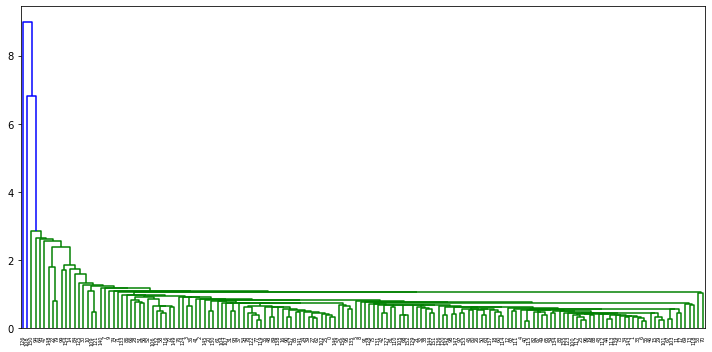

In [60]:
plt.figure(figsize = (10,5))
mergings = linkage(df1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.tight_layout()
plt.show()

##### Insight:
We didn't get a good view/result. Try for complete linkage.

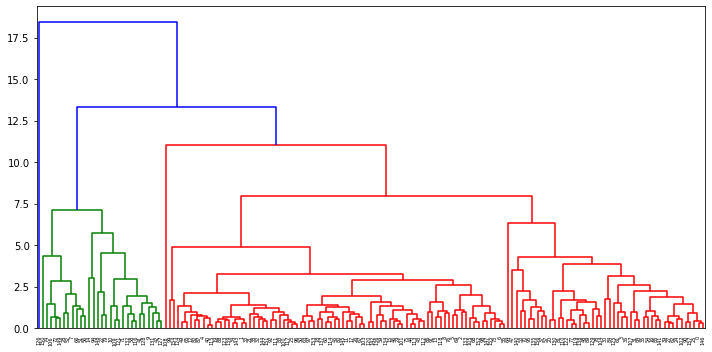

In [61]:
plt.figure(figsize = (10,5))
mergings = linkage(df1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.tight_layout()
plt.show()

##### Insight: 
At 12.5 there are 3 clusters and at 10.0 there are 4 clusters.
Let us cut the dendrogram such that there are n_clusters = 4

### 2. Cluster Analysis :

In [62]:
cluster_labels = cut_tree(mergings, n_clusters = 4).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

In [63]:
df_hrcl = df.copy()
df_hrcl.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [64]:
df_hrcl['Cluster_ID'] = pd.Series(cluster_labels, index=df.index)
df_hrcl.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [65]:
#Checking the number of countries assigned to each clusters
df_hrcl['Cluster_ID'].value_counts()

0    127
1     29
3      1
2      1
Name: Cluster_ID, dtype: int64

##### Insight:
The number of countries is different in each cluster in case of Hierarchical clustering than KMeans clustering, which is fine because both the methods are different.

### 3. Profiling the clusters based on - [gdpp, child_mort and income]

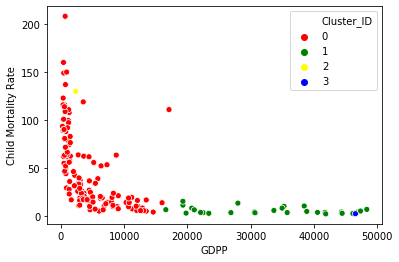

In [66]:
axes = sns.scatterplot(x='gdpp',y='child_mort',hue='Cluster_ID',legend='full',data=df_hrcl, palette=['red','green','yellow','blue'])
axes.set(xlabel = 'GDPP', ylabel= 'Child Mortality Rate')
plt.show()

##### Insight :
Low gdpp with high child_mort is satisfied by cluster 0.

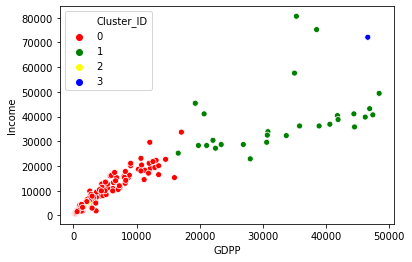

In [67]:
axes = sns.scatterplot(x='gdpp',y='income',hue='Cluster_ID',legend='full',data=df_hrcl, palette=['red','green','yellow','blue'])
axes.set(xlabel = 'GDPP', ylabel= 'Income')
plt.show()

##### Insight:
Low gdpp with low income is satisfied by cluster 0.

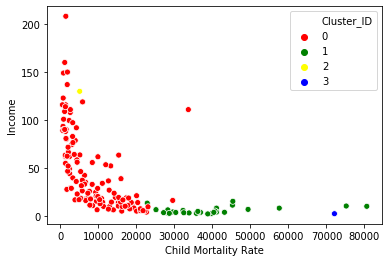

In [68]:
axes= sns.scatterplot(x='income',y='child_mort',hue='Cluster_ID',legend='full',data=df_hrcl, palette=['red','green','yellow','blue'])
axes.set(xlabel = 'Child Mortality Rate', ylabel= 'Income')
plt.show()

##### Insight:
Low income with high child_mort is satisfied by cluster 0.

#### From above figures, it is concluded that the countries in cluster 0 are in direct need of aid.

#### Taking the means and analyzing the clusters further

In [69]:
clusters_child_mort = pd.DataFrame(df_hrcl.groupby(["Cluster_ID"]).child_mort.mean())
clusters_exports = pd.DataFrame(df_hrcl.groupby(["Cluster_ID"]).exports.mean())
clusters_health = pd.DataFrame(df_hrcl.groupby(["Cluster_ID"]).health.mean())
clusters_imports = pd.DataFrame(df_hrcl.groupby(["Cluster_ID"]).imports.mean())
clusters_income = pd.DataFrame(df_hrcl.groupby(["Cluster_ID"]).income.mean())
clusters_inflation = pd.DataFrame(df_hrcl.groupby(["Cluster_ID"]).inflation.mean())
clusters_life_expec = pd.DataFrame(df_hrcl.groupby(["Cluster_ID"]).life_expec.mean())
clusters_total_fer = pd.DataFrame(df_hrcl.groupby(["Cluster_ID"]).total_fer.mean())
clusters_gdpp = pd.DataFrame(df_hrcl.groupby(["Cluster_ID"]).gdpp.mean())

In [70]:
df_hrcl_cluster = pd.concat([pd.Series([0,1,2,3]),clusters_child_mort,clusters_exports,clusters_health,clusters_imports,clusters_income,clusters_inflation,clusters_life_expec,clusters_total_fer,clusters_gdpp], axis=1)

In [71]:
df_hrcl_cluster.columns = ["Cluster_ID","clusters_child_mort","clusters_exports","clusters_health","clusters_imports","clusters_income","clusters_inflation","clusters_life_expec","clusters_total_fer","clusters_gdpp"]
df_hrcl_cluster

,Cluster_ID,clusters_child_mort,clusters_exports,clusters_health,clusters_imports,clusters_income,clusters_inflation,clusters_life_expec,clusters_total_fer,clusters_gdpp
0,0,47.558268,1953.259508,285.526331,2069.379387,8663.094488,8.401528,67.816535,3.272835,4458.929134
1,1,6.148276,15076.862069,2941.186552,13582.134483,39024.137931,3.750069,79.268966,1.823448,32796.551724
2,2,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000
3,3,2.800000,93200.000000,1845.360000,81084.000000,72100.000000,-0.046000,82.700000,1.150000,46600.000000


### 4. Visualize the Clusters :

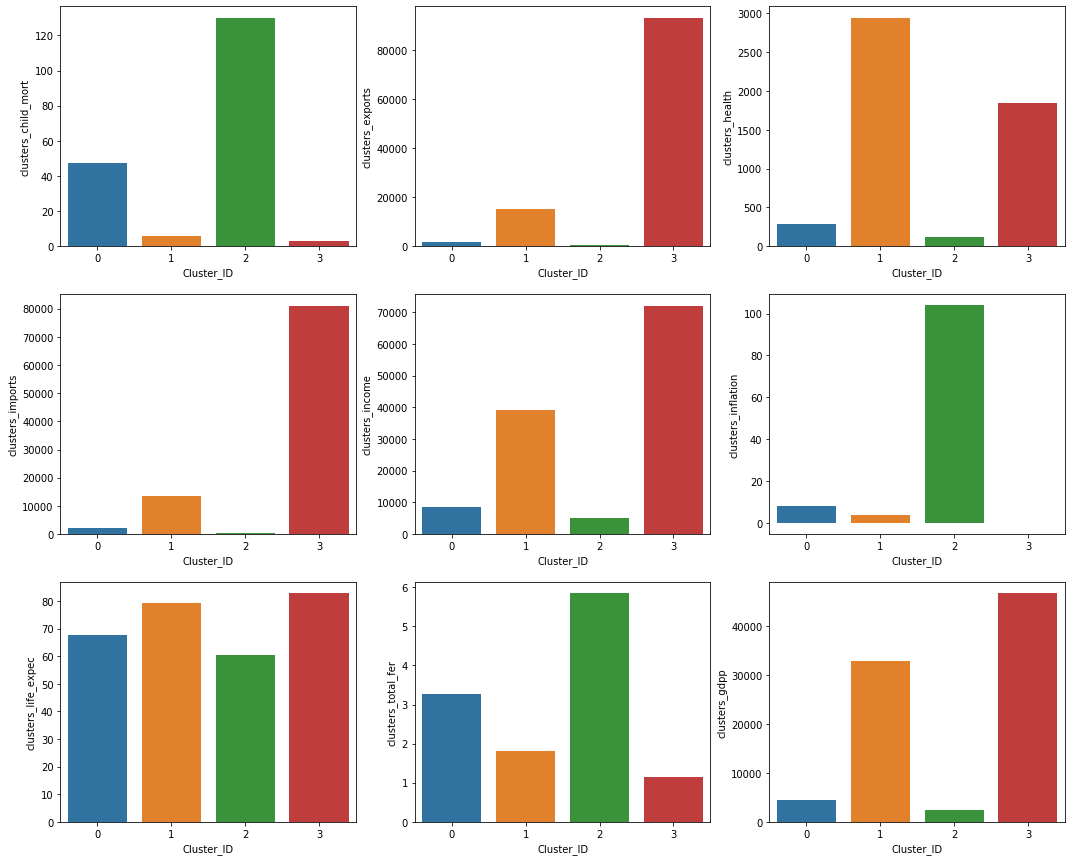

In [72]:
features = df_hrcl_cluster.columns
fig = plt.figure(figsize=(18,15))
for plot, feature in enumerate(features[1:]):
    fig.add_subplot(3,3,plot+1)
    sns.barplot(df_hrcl_cluster.Cluster_ID, df_hrcl_cluster[feature])

### 5. Country Identification :

In [73]:
#Binning the clusters to get the top 10 countries sorted in order exaplined above
clustered_hrcl=df[df_hrcl['Cluster_ID']==0]
clustered_hrcl.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482


So from the above results and analysis, we can conclude that as per Heirarchical clustering, the country which are direct need of aid are:

Burundi,Liberia,Congo, Dem. Rep,Niger,Sierra Leone, Madagascar,Mozambique,Central African Republic,Malawi,Eritrea

# Conclusion :

1. We got same countries by both K-means and Heirarchical Clustering techniques which are in direst need of aid by considering socio – economic factor like high child mortality rate, low income of people and low gdpp of country into consideration:
Burundi,Liberia,Congo, Dem. Rep,Niger,Sierra Leone, Madagascar,Mozambique,Central African Republic,Malawi,Eritrea
2. The socio-economy and health factors that need to be focus on to analyze under-developed countries are the child mortality rate of the country is very high, the income per population is very low and GDP per capita of the country is very low.
3. For the betterment of the country’s condition, NGO should provide basic amenities and relief during the time of disasters and natural calamities to these countries.


•	Business Aspect of choosing K-means – In our problem, since Hierarchical clustering is taking more time to execute it is recommened to use K-means clustering to analyze the name of countries according to their GDP per capita, income of their population and child mortality of that country. Here k value is 3. So we have 3 clusters, one with developed countries with low child_mort and high income and high gdpp, Another cluster all there 3 variables with medium range while the other cluster has high child_mort and low income and low gdpp. Then by visualizing these clusters we determined the particular cluster with under-developed countries